# 0) Instructions:
Please complete the workbook below. Some of the calculations are already ready to be "run". However, please read the text carefully to find questions that you should answer for credit. Remember that to answer a question in text, you click "insert", then "insert cell below", switch the input from "code" to "markdown", type your answer, and finally click the run button to set your text in stone. In a few questions, you will need to do some calculations on your own. Hint: for these calculations you can copy, paste, and modify code that is above the calculation that you need to do. You may work by yourself or in groups of 2. Please remember to put your name on top, remember to save the workbook, and remember to upload to Canvas.

In [98]:
library(tidyverse)
library(rpart)
library(DescTools)
options(repr.plot.width = 5, repr.plot.height = 4)

O. Nativ, Y. Raz, H.Z. Winkler, Y. Hosaka, E.T. Boyle, T.M. Therneau, G.M. Farrow, R.P. Meyers, H. Zincke, and M.M Lieber.  (1988). Prognostic value of flow cytometric nuclear DNA analysis in stage C prostate carcinoma. *Surgical Forum, 39*, 685-687.

In [65]:
data(stagec)
stagec <- stagec[!is.na(stagec$g2) & !is.na(stagec$gleason),]
stagec$grade <- as.factor(stagec$grade)
stagec$gleason <- as.character(stagec$gleason)
stagec$gleason[stagec$gleason %in% c("3", "4")] <- "3-4"
stagec$gleason[stagec$gleason %in% c("8", "9", "10")] <- "8-10"
stagec$gleason <- as.factor(stagec$gleason)

In [59]:
head(stagec)

,pgtime,pgstat,age,eet,g2,grade,gleason,ploidy
1,6.1,0,64,2,10.26,2,3-4,diploid
3,5.2,1,59,2,9.99,3,7,diploid
4,3.2,1,62,2,3.57,2,3-4,diploid
5,1.9,1,64,2,22.56,4,8-10,tetraploid
6,4.8,0,69,1,6.14,3,7,diploid
9,3.7,1,73,2,11.77,3,6,diploid


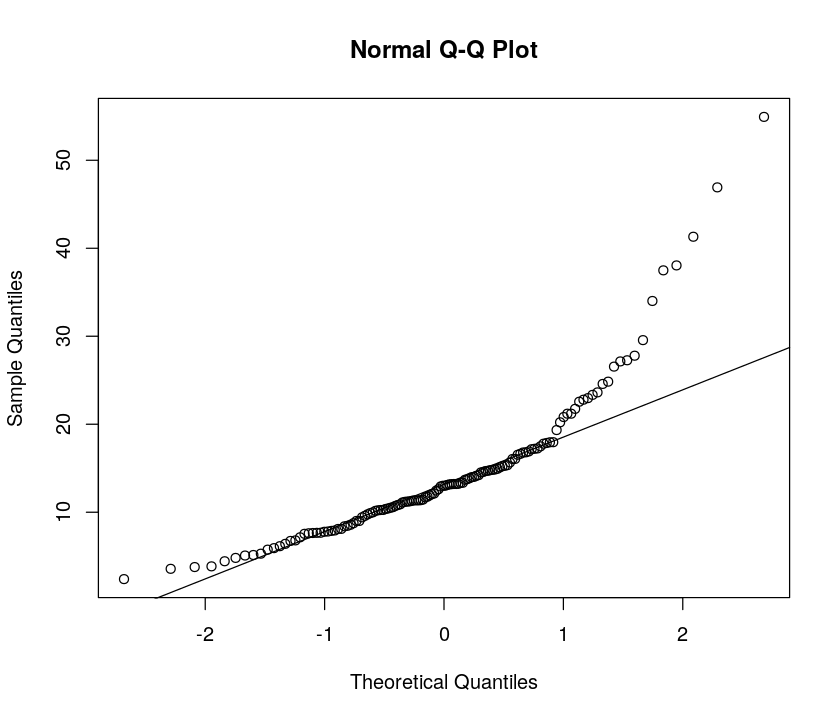

In [60]:
options(repr.plot.width = 7, repr.plot.height = 6)
qqnorm(stagec$g2)
qqline(stagec$g2)

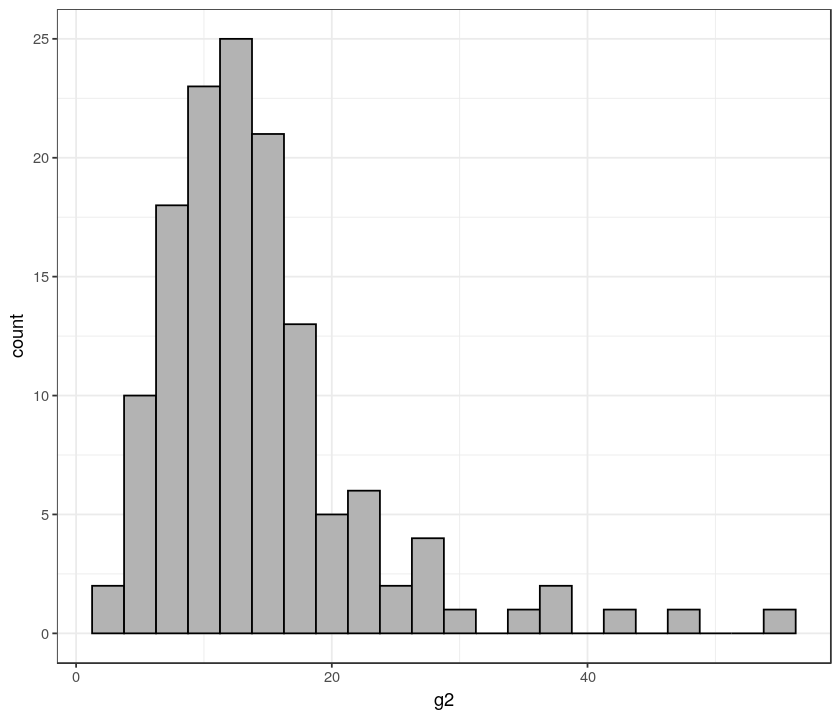

In [61]:
ggplot(stagec, aes(x = g2)) + geom_histogram(color = "black", fill = "grey70", bins = 22) + theme_bw()

In [62]:
table(stagec$gleason)


 3-4    5    6    7 8-10 
   8   34   33   36   25 

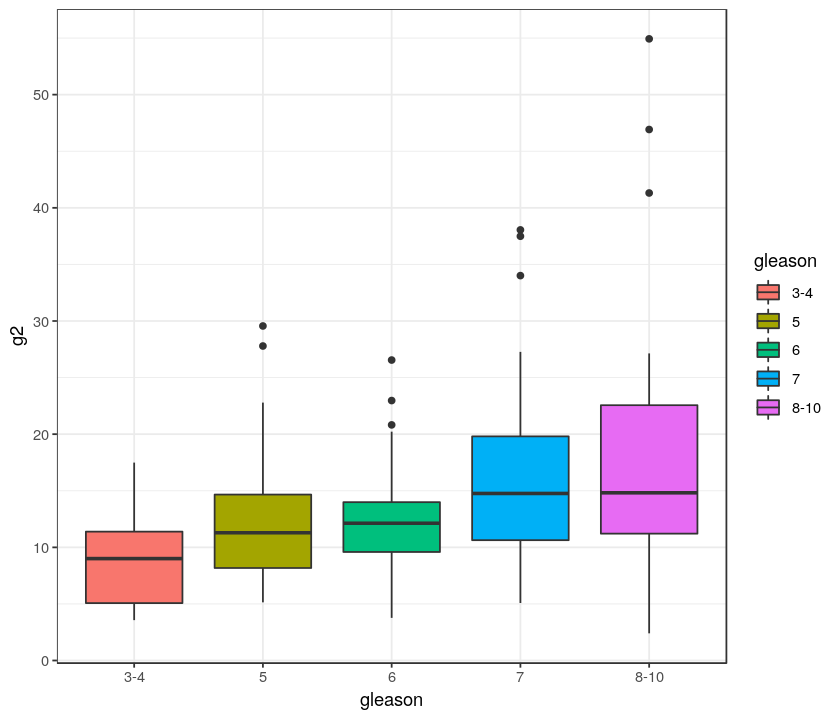

In [63]:
ggplot(stagec, aes(x = gleason, group = gleason, y = g2, fill = gleason)) + geom_boxplot() + theme_bw()

In [67]:
stagec$g2

[1] 10.26  9.99  3.57 22.56  6.14 11.77 27.27 19.34 14.82 10.22 15.66 17.79
 [13] 11.11 11.44 14.78 54.93 24.58 27.79 14.86 10.51 14.22 15.28 16.91 17.87
 [25] 12.13 17.25 16.53 17.49  3.85  7.88 16.64 13.19  9.42 22.79 11.37  3.77
 [37] 13.76 14.52  7.55  8.46  7.66  8.40  4.43 10.37 10.82  7.81 11.23 13.99
 [49]  6.41 16.05 22.97  2.40 11.92  5.29  5.75  7.64 16.81 29.56 13.35  8.10
 [61] 12.62 14.14 10.16 17.21 11.35 11.35  7.61 20.82 12.93 21.75  8.58 14.94
 [73] 17.16 23.62 16.06  7.15 13.21 11.35  8.11 11.18 24.84  7.67 15.23  6.80
 [85] 14.58 13.17  9.76 38.05 13.87 21.20 17.96 27.14  6.74 11.21 20.22 15.35
 [97] 16.79  8.76 13.23 34.01 14.68 17.95 23.34 10.25 15.10 26.55  7.78 21.20
[109]  7.93 10.58  5.92  5.08 13.10 41.31 11.29 14.02 12.46 13.69 12.06 13.01
[121] 13.21 10.43 13.33 37.49 11.69  9.90 13.01  4.81 14.71  9.01 10.90 10.72
[133]  5.14 46.92  9.59  9.01

In [68]:
order(stagec$g2)

[1]  52   3  36  29  43 128 112 133  54  55 111   5  49  93  84  76  39  67
 [19]  56  41  82 107  46  30 109  60  79  42  40  71  98 130 136  33 135  87
 [37] 126   2  63  10 104   1  44 122  20 110 132  45 131  13  80  94  47 115
 [55]  65  66  78  35  14 125   6  53 119  25 117  61  69 120 127 113  86  32
 [73]  77 121  99 123  59 118  37  89  48 116  62  21  38  85 101 129  15   9
 [91]  19  72 105  83  22  96  11  50  75  27  31  97  57  23  73  64  26  28
[109]  12  24 102  91   8  95  68  90 108  70   4  34  51 103  74  17  81 106
[127]  92   7  18  58 100 124  88 114 134  16

In [69]:
stagec$g2[order(stagec$g2)]

[1]  2.40  3.57  3.77  3.85  4.43  4.81  5.08  5.14  5.29  5.75  5.92  6.14
 [13]  6.41  6.74  6.80  7.15  7.55  7.61  7.64  7.66  7.67  7.78  7.81  7.88
 [25]  7.93  8.10  8.11  8.40  8.46  8.58  8.76  9.01  9.01  9.42  9.59  9.76
 [37]  9.90  9.99 10.16 10.22 10.25 10.26 10.37 10.43 10.51 10.58 10.72 10.82
 [49] 10.90 11.11 11.18 11.21 11.23 11.29 11.35 11.35 11.35 11.37 11.44 11.69
 [61] 11.77 11.92 12.06 12.13 12.46 12.62 12.93 13.01 13.01 13.10 13.17 13.19
 [73] 13.21 13.21 13.23 13.33 13.35 13.69 13.76 13.87 13.99 14.02 14.14 14.22
 [85] 14.52 14.58 14.68 14.71 14.78 14.82 14.86 14.94 15.10 15.23 15.28 15.35
 [97] 15.66 16.05 16.06 16.53 16.64 16.79 16.81 16.91 17.16 17.21 17.25 17.49
[109] 17.79 17.87 17.95 17.96 19.34 20.22 20.82 21.20 21.20 21.75 22.56 22.79
[121] 22.97 23.34 23.62 24.58 24.84 26.55 27.14 27.27 27.79 29.56 34.01 37.49
[133] 38.05 41.31 46.92 54.93

In [70]:
stagec[order(stagec$g2),]

,pgtime,pgstat,age,eet,g2,grade,gleason,ploidy
55,1.0,1,61,1,2.40,4,8-10,diploid
4,3.2,1,62,2,3.57,2,3-4,diploid
39,0.3,1,59,2,3.77,3,6,aneuploid
32,9.3,0,64,1,3.85,3,6,aneuploid
46,8.7,0,70,1,4.43,1,3-4,diploid
137,2.4,0,63,2,4.81,3,8-10,diploid
120,3.1,0,59,2,5.08,3,7,diploid
142,10.2,0,63,2,5.14,2,5,diploid
58,16.7,0,56,2,5.29,1,3-4,diploid
59,4.5,0,63,2,5.75,2,5,diploid


In [71]:
stagec <- stagec[order(stagec$g2),]

In [72]:
stagec$G2Rank <- 1:nrow(stagec)

In [73]:
head(stagec)

,pgtime,pgstat,age,eet,g2,grade,gleason,ploidy,G2Rank
55,1.0,1,61,1,2.40,4,8-10,diploid,1
4,3.2,1,62,2,3.57,2,3-4,diploid,2
39,0.3,1,59,2,3.77,3,6,aneuploid,3
32,9.3,0,64,1,3.85,3,6,aneuploid,4
46,8.7,0,70,1,4.43,1,3-4,diploid,5
137,2.4,0,63,2,4.81,3,8-10,diploid,6


In [74]:
table(stagec$g2)


  2.4  3.57  3.77  3.85  4.43  4.81  5.08  5.14  5.29  5.75  5.92  6.14  6.41 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 6.74   6.8  7.15  7.55  7.61  7.64  7.66  7.67  7.78  7.81  7.88  7.93   8.1 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
 8.11   8.4  8.46  8.58  8.76  9.01  9.42  9.59  9.76   9.9  9.99 10.16 10.22 
    1     1     1     1     1     2     1     1     1     1     1     1     1 
10.25 10.26 10.37 10.43 10.51 10.58 10.72 10.82  10.9 11.11 11.18 11.21 11.23 
    1     1     1     1     1     1     1     1     1     1     1     1     1 
11.29 11.35 11.37 11.44 11.69 11.77 11.92 12.06 12.13 12.46 12.62 12.93 13.01 
    1     3     1     1     1     1     1     1     1     1     1     1     2 
 13.1 13.17 13.19 13.21 13.23 13.33 13.35 13.69 13.76 13.87 13.99 14.02 14.14 
    1     1     1     2     1     1     1     1     1     1     1     1     1 
14.22 14.52 14.58 14.68 14.71 14.78 14.82 14.86 14.

In [76]:
stagec[stagec$gleason == "3-4",]

,pgtime,pgstat,age,eet,g2,grade,gleason,ploidy,G2Rank
4,3.2,1,62,2,3.57,2,3-4,diploid,2
46,8.7,0,70,1,4.43,1,3-4,diploid,5
58,16.7,0,56,2,5.29,1,3-4,diploid,9
83,6.7,0,54,2,8.11,2,3-4,diploid,27
135,6.0,0,52,2,9.90,2,3-4,diploid,37
1,6.1,0,64,2,10.26,2,3-4,diploid,42
18,13.2,0,57,2,14.78,2,3-4,tetraploid,89
31,2.9,1,68,2,17.49,2,3-4,tetraploid,108


In [77]:
stagec$G2Rank[stagec$gleason == "3-4"]

[1]   2   5   9  27  37  42  89 108

In [78]:
sum(stagec$G2Rank[stagec$gleason == "3-4"])

[1] 319

In [80]:
table(stagec$gleason)


 3-4    5    6    7 8-10 
   8   34   33   36   25 

In [86]:
stagec %>% group_by(gleason) %>% summarize(sumOfRanks = sum(G2Rank), n = n(), sumOfRanksSqDivn = sumOfRanks^2 / n)

gleason,sumOfRanks,n,sumOfRanksSqDivn
3-4,319,8,12720.12
5,1970,34,114144.12
6,2083,33,131481.48
7,2872,36,229121.78
8-10,2072,25,171727.36


In [87]:
sr <- stagec %>% group_by(gleason) %>% summarize(sumOfRanks = sum(G2Rank), n = n(), sumOfRanksSqDivn = sumOfRanks^2 / n)

In [88]:
sum(sr$n)

[1] 136

In [89]:
sum(sr$sumOfRanksSqDivn)

[1] 659194.9

In [91]:
12 / (136 * 137) * sum(sr$sumOfRanksSqDivn) - 3 * (136 + 1)

[1] 13.55659

In [92]:
qchisq(.05, 4, lower.tail = FALSE)

[1] 9.487729

In [93]:
pchisq(12 / (136 * 137) * sum(sr$sumOfRanksSqDivn) - 3 * (136 + 1), 4, lower.tail = FALSE)

[1] 0.008853364

In [66]:
kruskal.test(g2 ~ gleason, data = stagec)


	Kruskal-Wallis rank sum test

data:  g2 by gleason
Kruskal-Wallis chi-squared = 13.559, df = 4, p-value = 0.008845


In [96]:
pairwise.wilcox.test(stagec$g2, stagec$gleason, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  stagec$g2 and stagec$gleason 

     3-4   5     6     7    
5    0.199 -     -     -    
6    0.118 0.506 -     -    
7    0.012 0.022 0.073 -    
8-10 0.015 0.020 0.044 0.741

P value adjustment method: none 

In [97]:
pairwise.wilcox.test(stagec$g2, stagec$gleason, p.adjust.method = "bonf")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test 

data:  stagec$g2 and stagec$gleason 

     3-4  5    6    7   
5    1.00 -    -    -   
6    1.00 1.00 -    -   
7    0.12 0.22 0.73 -   
8-10 0.15 0.20 0.44 1.00

P value adjustment method: bonferroni 

In [3]:
matrix1 <- matrix(c(36, 43, 16, 62), nrow = 2, ncol = 2, byrow = TRUE)
colnames(matrix1) <- c("Effective", "NotEffective")
rownames(matrix1) <- c("THC", "Prochlorperazine")

In [4]:
matrix1

,Effective,NotEffective
THC,36,43
Prochlorperazine,16,62


In [100]:
BinomCI(36, 36 + 43, conf.level = 0.95, method = "wald")

est,lwr.ci,upr.ci
0.4556962,0.3458733,0.5655191


In [101]:
BinomCI(36, 36 + 43, conf.level = 0.95, method = "agresti-coull")

est,lwr.ci,upr.ci
0.4577506,0.3504658,0.5650354
